In [37]:
#1. zadatak

import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


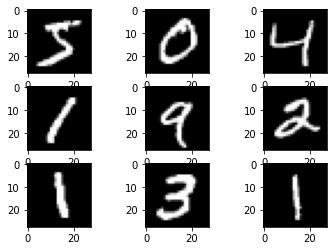

In [17]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [18]:
# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu

model = Sequential([
keras.layers.Flatten(input_shape=(28,28,1)),
keras.layers.Dense(units=256,activation='relu'),
keras.layers.Dense(units=256,activation='relu'),
keras.layers.Dense(units=10,activation='softmax')
])


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [20]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# TODO: provedi ucenje mreze
batch_size=32
epochs=10
hist=model.fit(x_train_s, y_train_s, epochs=epochs, batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2009 - accuracy: 0.9391
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0822 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0590 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0443 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0342 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0283 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0199 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.018

Test loss: 0.10306091606616974
Test accuracy: 0.9776999950408936
313/313 [==============================] - 1s 2ms/step


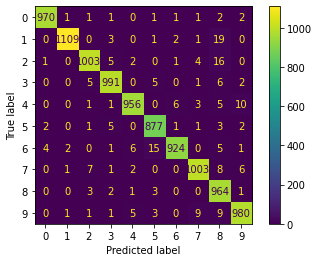

In [22]:
# TODO: Prikazi test accuracy i matricu zabune
score = model.evaluate(x_test_s, y_test_s, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

predicted_classes = np.argmax(model.predict(x_test_s), axis = -1)
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [23]:
# TODO: spremi model
model.save('first_model')

In [38]:
#2. zadatak

from keras.utils import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

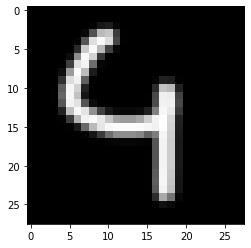

In [29]:
filename = 'test.png'

img = cv.imread(filename=filename)
img = color.rgb2gray((img))
img = resize(img, (28, 28))

plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')

In [31]:
# TODO: ucitaj model
model = load_model(filepath="first_model")

In [32]:
# TODO: napravi predikciju 

prediction = model.predict(img)
classes = np.argmax(prediction, axis=1)

1/1 [==============================] - 0s 94ms/step


In [33]:
# TODO: ispis rezultat
print("------------------------")
print("Prediction is number: ", classes[0])

------------------------
Prediction is number:  4


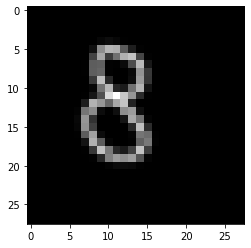

1/1 [==============================] - 0s 45ms/step
------------------------
Prediction is number:  8


In [36]:
# testranje s drugim brojem
filename = 'test2.png'

img = cv.imread(filename=filename)
img = color.rgb2gray((img))
img = resize(img, (28, 28))

plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')

model = load_model(filepath="first_model")

prediction = model.predict(img)
classes = np.argmax(prediction, axis=1)

print("------------------------")
print("Prediction is number: ", classes[0])